In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Configuração para que os gráficos apareçam no notebook
%matplotlib inline

In [22]:
# Substitua 'creditcard.csv' pelo nome exato do seu arquivo
df = pd.read_csv('creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [23]:
# 1. Visualizar as primeiras linhas (ajuda a ver o formato dos dados)
print("--- Primeiras 5 linhas do DataFrame ---")
print(df.head())

# 2. Verificar as dimensões (quantas linhas/registros e colunas/atributos)
print("\n--- Dimensões (Linhas, Colunas) ---")
print(df.shape)

# 3. Informações sobre colunas e tipos de dados (dtypes)
print("\n--- Tipos de Dados e Valores Não-Nulos ---")
df.info()

# 4. Estatísticas descritivas básicas das colunas numéricas
print("\n--- Estatísticas Descritivas ---")
print(df.describe())

--- Primeiras 5 linhas do DataFrame ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V16       V17       V18       V19       V20  \
0  0.098698  0.363787  ... -0.470401  0.207971  0.025791  0.403993  0.251412   
1  0.085102 -0.255425  ...  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2  0.247676 -1.514654  ... -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3  0.377436 -1.387024  ... -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -0.270533  0.817739  ... -0.451449 -0.237033 -0.038195  0.803487  0.408

In [24]:
# Contagem de valores na coluna 'Class'
contagem_classe = df['Class'].value_counts()
print("--- Contagem de Classes ---")
print(contagem_classe)

# Calcular a proporção de cada classe
proporcao_classe = contagem_classe / len(df) * 100
print("\n--- Proporção de Classes (%) ---")
print(proporcao_classe)

--- Contagem de Classes ---
Class
0    283253
1       473
Name: count, dtype: int64

--- Proporção de Classes (%) ---
Class
0    99.83329
1     0.16671
Name: count, dtype: float64


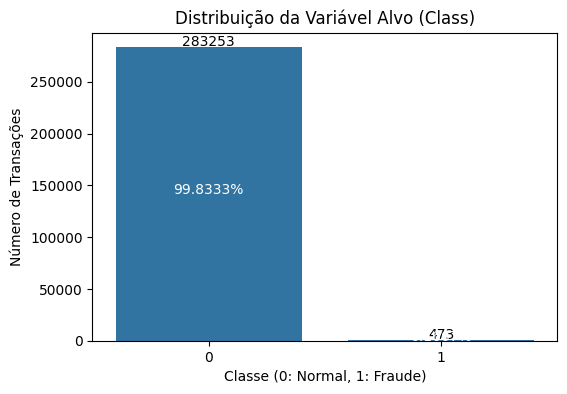

In [25]:
# Cria o gráfico de barras usando Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)

# Adiciona títulos e rótulos
plt.title('Distribuição da Variável Alvo (Class)')
plt.xlabel('Classe (0: Normal, 1: Fraude)')
plt.ylabel('Número de Transações')

# Adiciona o valor exato no topo de cada barra
for i, v in enumerate(contagem_classe):
    plt.text(i, v + 1000, str(v), ha='center', fontsize=10)
    plt.text(i, v / 2, f'{proporcao_classe.iloc[i]:.4f}%', ha='center', color='white', fontsize=10)

plt.show()

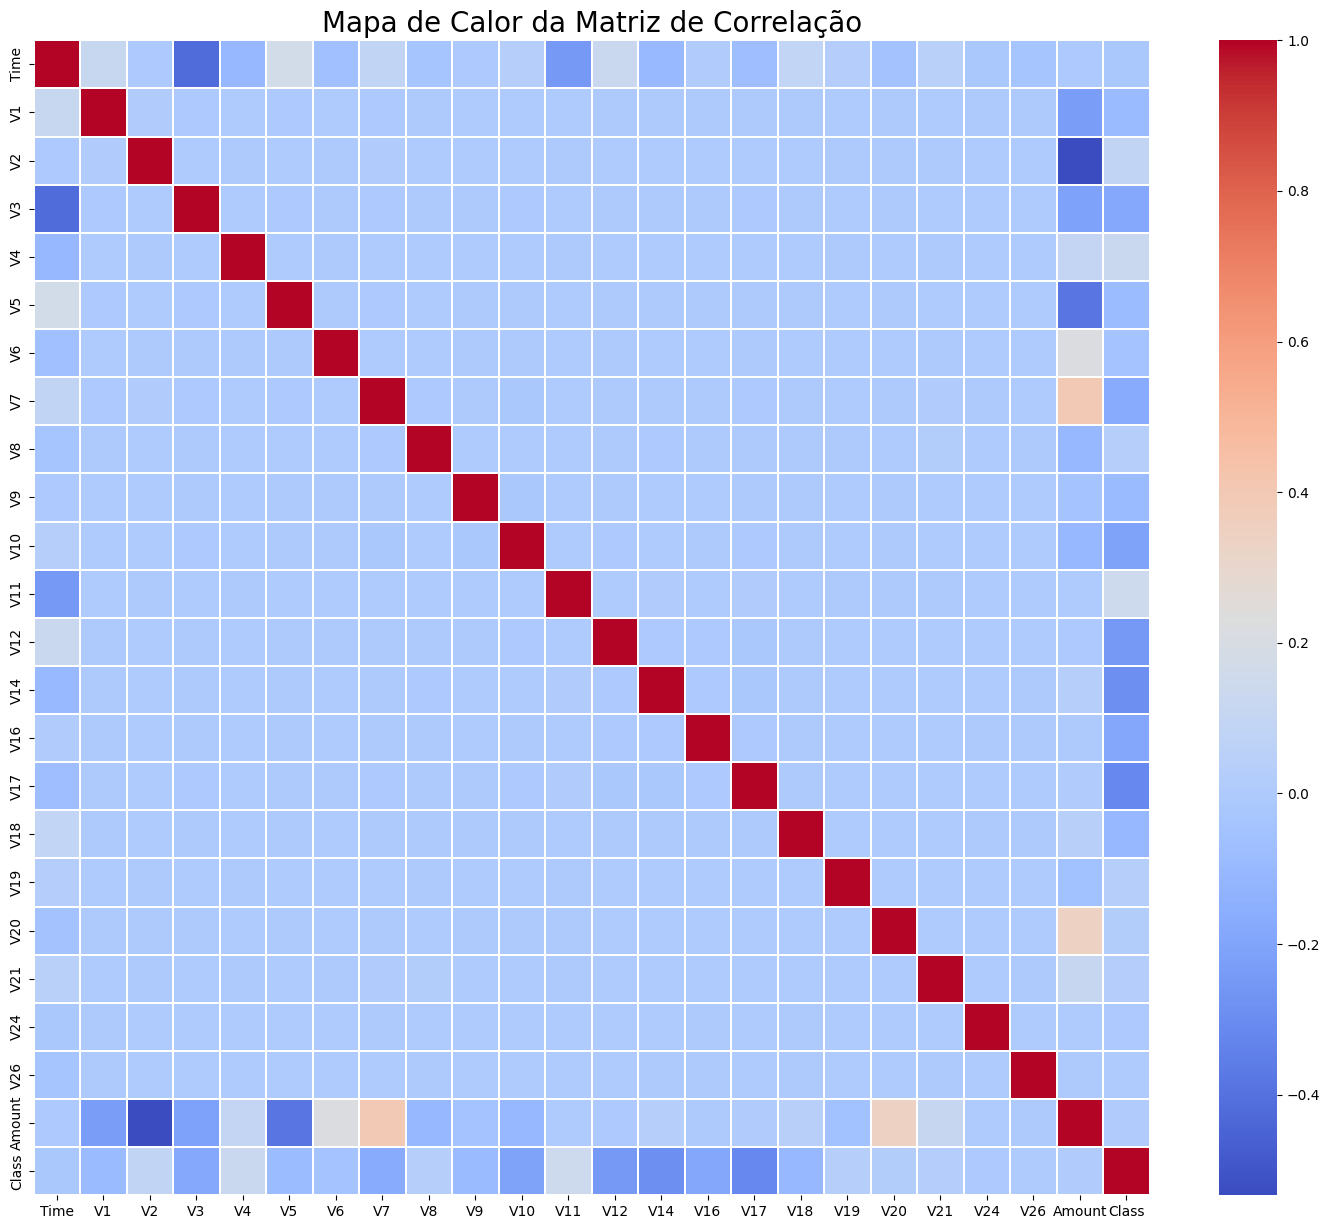

In [26]:
# 1. Calcular a matriz de correlação completa (inclui a 'Class')
correlation_matrix = df.corr()

# 2. Criar o mapa de calor usando Seaborn
plt.figure(figsize=(18, 15)) # Define o tamanho para melhor visualização
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm', # Esquema de cores: azul-vermelho (frio-quente)
    linecolor='white',
    linewidths=0.1,
    fmt='.2f' # Formata os valores de correlação com 2 casas decimais
)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=20)
plt.show()

In [1]:
# Seleciona apenas a linha de correlação com a coluna 'Class'
correlation_with_class = correlation_matrix['Class'].sort_values(ascending=False)

print("--- Correlação dos Atributos com a Variável Alvo (Class) ---")
print(correlation_with_class)

# Visualização gráfica (opcional, mas bom para o relatório)
plt.figure(figsize=(10, 8))
correlation_with_class.drop('Class').plot(kind='barh', color='skyblue')
plt.title('Correlação de Cada Atributo com a Classe (Fraude)')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Atributo')
plt.show()

NameError: name 'correlation_matrix' is not defined

In [ ]:
# Lista de atributos a serem removidos por baixa correlação
colunas_para_remover = ['V28', 'V27', 'V23', 'V22', 'V25', 'V13', 'V15']

# Cria um novo DataFrame 'df_limpo' sem as colunas removidas
df_limpo = df.drop(columns=colunas_para_remover, axis=1)

print(f"Número de colunas originais: {df.shape[1]}")
print(f"Número de colunas após a remoção: {df_limpo.shape[1]}")
print("\nPrimeiras 5 linhas do novo DataFrame:")
print(df_limpo.head())

# Atualiza a variável 'df' para 'df_limpo' para as próximas etapas
df = df_limpo

In [ ]:
print("--- Verificação de Tipos de Dados para Codificação ---")
print(df.info())

print("\nConclusão para o Relatório:")
print("A base de dados é composta majoritariamente por tipos de dados float64, indicando atributos numéricos.")
print("A etapa de Codificação (One-Hot ou Label Encoding) é, portanto, não aplicável.")

In [1]:
# Verifica o total de valores ausentes por coluna
print("--- Valores Ausentes por Coluna ---")
print(df.isnull().sum().sort_values(ascending=False))

--- Valores Ausentes por Coluna ---


NameError: name 'df' is not defined

In [2]:
# Contar o número de linhas duplicadas
num_duplicados = df.duplicated().sum()
print(f"\nNúmero de registros duplicados encontrados: {num_duplicados}")

if num_duplicados > 0:
    # Remover os registros duplicados e atualizar o DataFrame
    df = df.drop_duplicates(keep='first')
    print(f"Registros duplicados removidos. Novo número de linhas: {df.shape[0]}")

NameError: name 'df' is not defined

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Amount'])
plt.title('Boxplot da Variável Amount')
plt.ylabel('Valor da Transação')
plt.show()

print("Estatísticas Descritivas para Amount:")
print(df['Amount'].describe())

NameError: name 'plt' is not defined

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Time'])
plt.title('Boxplot da Variável Time')
plt.ylabel('Tempo (Segundos)')
plt.show()

print("\nEstatísticas Descritivas para Time:")
print(df['Time'].describe())

NameError: name 'plt' is not defined

In [5]:
from sklearn.model_selection import train_test_split

# 1. Definir Atributos Preditoras (X) e Variável Alvo (y)
X = df.drop('Class', axis=1) # Remove a coluna 'Class'
y = df['Class']

# 2. Realizar a divisão 70/30 (ou 80/20, dependendo da sua preferência)
# random_state garante que a divisão seja a mesma sempre que você rodar o código.
# stratify=y garante que a proporção de 0 e 1 seja mantida em ambos os conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, # 30% para teste
    random_state=42,
    stratify=y # ESSENCIAL! Garante a estratificação.
)

print("--- Distribuição Após Divisão Estratificada ---")
print(f"Total de amostras de treino: {len(X_train)}")
print(f"Total de amostras de teste: {len(X_test)}")
print("\nProporção de Classes no Treino:")
print(y_train.value_counts(normalize=True) * 100)
print("\nProporção de Classes no Teste:")
print(y_test.value_counts(normalize=True) * 100)

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Instanciar o Scaler
scaler = StandardScaler()

# Lista das colunas a serem escalonadas
colunas_para_escalonar = ['Time', 'Amount']

print("--- Aplicando Standard Scaler ---")

# 2. FIT & TRANSFORM no conjunto de TREINO
# O scaler APRENDE (fit) a média e o desvio-padrão APENAS com X_train
X_train[colunas_para_escalonar] = scaler.fit_transform(X_train[colunas_para_escalonar])
print("Colunas Time e Amount padronizadas em X_train.")

# 3. TRANSFORM (APENAS) no conjunto de TESTE
# O scaler APLICA (transform) a média e o desvio-padrão aprendidos no treino.
X_test[colunas_para_escalonar] = scaler.transform(X_test[colunas_para_escalonar])
print("Colunas Time e Amount padronizadas em X_test.")

print("\nPrimeiras linhas de X_train após padronização:")
print(X_train.head())

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Exibe a contagem antes do balanceamento
print("--- Contagem de Classes Antes do SMOTE (Treino) ---")
print(Counter(y_train))

# 1. Instanciar o SMOTE
smote = SMOTE(random_state=42)

# 2. Aplicar o SMOTE APENAS no conjunto de TREINO
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Exibe a contagem após o balanceamento
print("\n--- Contagem de Classes Após o SMOTE (Treino) ---")
print(Counter(y_train_res))

In [6]:
from sklearn.preprocessing import StandardScaler

# Instanciar o Scaler
scaler = StandardScaler()

# Lista das colunas a serem escalonadas
colunas_para_escalonar = ['Time', 'Amount']

print("--- Aplicando Standard Scaler ---")

# 1. FIT & TRANSFORM no conjunto de TREINO
# O scaler APRENDE (fit) APENAS com X_train
X_train[colunas_para_escalonar] = scaler.fit_transform(X_train[colunas_para_escalonar])
print("Colunas Time e Amount padronizadas em X_train.")

# 2. TRANSFORM (APENAS) no conjunto de TESTE
# O scaler APLICA (transform) os parâmetros aprendidos no treino.
X_test[colunas_para_escalonar] = scaler.transform(X_test[colunas_para_escalonar])
print("Colunas Time e Amount padronizadas em X_test.")

print("\nPrimeiras linhas de X_train após padronização:")
print(X_train.head())

--- Aplicando Standard Scaler ---


NameError: name 'X_train' is not defined

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Exibe a contagem antes do balanceamento
print("--- Contagem de Classes Antes do SMOTE (Treino) ---")
print(Counter(y_train))

# 1. Instanciar o SMOTE
smote = SMOTE(random_state=42)

# 2. Aplicar o SMOTE APENAS no conjunto de TREINO
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Exibe a contagem após o balanceamento
print("\n--- Contagem de Classes Após o SMOTE (Treino) ---")
print(Counter(y_train_res))

--- Contagem de Classes Antes do SMOTE (Treino) ---


NameError: name 'y_train' is not defined

In [8]:
# Recombina X_train e X_test para obter o conjunto X completo e escalonado
# (Este X_scaled_all é o seu X final, pronto para agrupamento)
X_scaled_all = pd.concat([X_train, X_test])

print(f"Conjunto de dados (escalonado) para Agrupamento tem {X_scaled_all.shape[0]} registros.")

NameError: name 'pd' is not defined

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Instanciar e Treinar (k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled_all)

# 2. Avaliar a Qualidade do Agrupamento (Silhueta)
# A Silhueta é a métrica mais pedida para avaliação de qualidade de clusters. [cite: 24]
silhouette_avg = silhouette_score(X_scaled_all, kmeans_labels)

print("--- K-Means (k=2) ---")
print(f"Número de amostras por cluster: {pd.Series(kmeans_labels).value_counts()}")
print(f"Valor do Coeficiente de Silhueta: {silhouette_avg:.4f}")

NameError: name 'X_scaled_all' is not defined

In [10]:
from sklearn.cluster import DBSCAN

# Hiperparâmetros base: eps=2 (raio), min_samples=10 (densidade)
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled_all)

# O DBSCAN pode rotular 'ruído' como cluster -1.
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print("--- DBSCAN ---")
print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de amostras por cluster: {pd.Series(dbscan_labels).value_counts()}")

# Se houver mais de um cluster (e não apenas ruído), calcule a Silhueta
if num_clusters > 1:
    # A Silhueta só pode ser calculada em amostras não-ruído
    sample_indices = dbscan_labels != -1
    silhouette_avg_dbscan = silhouette_score(X_scaled_all[sample_indices], dbscan_labels[sample_indices])
    print(f"Valor do Coeficiente de Silhueta (Excluindo Ruído): {silhouette_avg_dbscan:.4f}")
else:
    print("O DBSCAN não encontrou clusters significativos (ou encontrou apenas um).")

NameError: name 'X_scaled_all' is not defined